<a href="https://colab.research.google.com/github/Utpal-Mishra/Omdena-Cameroon-Chapter-2022/blob/main/OmdenaCameroonChapter2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANGLOPHONE CRISIS**

### The Anglophone Crisis is an ongoing armed conflict in the Republic of Cameroon in Central Africa, where historically English-speaking Ambazonian separatists are seeking the independence of the former British colony of Southern Cameroons, which was unified with Cameroon since 1961.

References: 
1. https://en.wikipedia.org/wiki/Timeline_of_the_Anglophone_Crisis_(2019)
2. https://en.wikipedia.org/wiki/Anglophone_Crisis
3. https://en.wikipedia.org/wiki/Anglophone_problem

### Libraries

In [265]:
import requests
from tqdm import tqdm
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt

In [266]:
events = []

# Anglophone Crisis 2017

## Data Extraction

### Requesting Wiki Data Access

In [267]:
"""from google.colab import drive
drive.mount('/content/drive')"""


url = 'https://en.wikipedia.org/wiki/Timeline_of_the_Anglophone_Crisis_(2017)'
r = requests.get(url)
print("Request Status: ", r)

Request Status:  <Response [200]>


### HTML Parsing

In [268]:
soup = BeautifulSoup(r.text, 'html.parser')
# data = soup.find_all('h2')[1:-2]
# print(data[0])
# month = data[0].find().text

In [269]:
# data = soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[6:][1]
# print(data)

################################################################################

# print(data.find_all('li')[1].text.split(",")[0].strip())
# print(data.find_all('li')[1].text.split(",", 1)[1].strip())

################################################################################

"""
# days = len(data.find_all('li'))

# Sep 9             
date = data.find_all('li')[0].split(",")[0]
event = data.find_all('li')[0].split(",")[1]

# Sep 11            data.find_all('li')[1]
date = data.find_all('li')[1].split(",")[0]
event = data.find_all('li')[1].split(",")[1]

# Sep 21            data.find_all('li')[2]
date = data.find_all('li')[2].split(",")[0]
event = data.find_all('li')[2].split(",")[1]

# Sep 22            data.find_all('li')[3]
date = data.find_all('li')[3].split(",")[0]
event = data.find_all('li')[3].split(",")[1]

# Sep 29            data.find_all('li')[4]
date = data.find_all('li')[4].split(",")[0]
event = data.find_all('li')[4].split(",")[1]

# Throughtout Sep   data.find_all('li')[5]
date = data.find_all('li')[5].split(",")[0]
event = data.find_all('li')[5].split(",")[1]
"""

################################################################################

# months = len(soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[6:])

# september  len(soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[6:][0]
# october    len(soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[6:][1]
# november   len(soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[6:][2]
# december   len(soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[6:][3]

################################################################################


"""
for i in range(0, len(soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[6:])):
  #print("Month:")
  print(soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[5].find_all('li')[i].find('a').text.split()[1])

  data = soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[6:][i]

  for k in range(len(data.find_all('li'))):

    print("Date: ", data.find_all('li')[k].text.split(",")[0].strip())
    print("Event: ", data.find_all('li')[k].text.split(",", 1)[1].strip())
  
  print("\n")
  """

'\nfor i in range(0, len(soup.find_all(\'div\', {\'class\': \'mw-parser-output\'})[0].find_all(\'ul\')[6:])):\n  #print("Month:")\n  print(soup.find_all(\'div\', {\'class\': \'mw-parser-output\'})[0].find_all(\'ul\')[5].find_all(\'li\')[i].find(\'a\').text.split()[1])\n\n  data = soup.find_all(\'div\', {\'class\': \'mw-parser-output\'})[0].find_all(\'ul\')[6:][i]\n\n  for k in range(len(data.find_all(\'li\'))):\n\n    print("Date: ", data.find_all(\'li\')[k].text.split(",")[0].strip())\n    print("Event: ", data.find_all(\'li\')[k].text.split(",", 1)[1].strip())\n  \n  print("\n")\n  '

In [270]:
month = []
date  = []
event = []

for i in tqdm(range(0, len(soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[6:]))):
  data = soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[6:][i]
  
  for k in range(len(data.find_all('li'))):
    month.append(soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[5].find_all('li')[i].find('a').text.split()[1])

    date.append(data.find_all('li')[k].text.split(",")[0].strip()) #.split(" ", 1)[1])
    event.append(data.find_all('li')[k].text.split(",", 1)[1].strip())

100%|██████████| 4/4 [00:00<00:00, 30.70it/s]


### Date Cleaning

In [271]:
def checkDate(date):
  for i in range(len(date)):
    if date[i].split()[1] == 'September':
      date[i] = date[i].replace('September', '09')
    if date[i].split()[1] == 'October':
      date[i] = date[i].replace('October', '10')
    if date[i].split()[1] == 'November':
      date[i] = date[i].replace('November', '11')
    if date[i].split()[1] == 'December':
      date[i] = date[i].replace('December', '12')

  return date

date = checkDate(date)

In [272]:
def checkMonth(A17):
  for i in range(len(A17['date'])):
    dt = A17['date'][i].split()

    if len(dt) == 3:
      A17['date'][i] = str(dt[2]) + "/" + dt[1] + "/2017"
    else:
      A17['date'][i] = "30/" + dt[1] + "/2017"
    
  return A17

In [273]:
def checkFormat(A17):
  A17['date'][27] = A17['date'][27].split("–")[1]
  A17['date'][29] = A17['date'][29].replace('some', '12')

  return A17  

In [274]:
def toDate(A17):
  for i in range(len(A17['date'])):
    A17['date'][i] = dt.strptime(A17['date'][i], '%d/%m/%Y').date()

  return A17

In [275]:
def formatEvent(A17):
  for i in range(len(A17)):
    A17['event'][i] = A17['event'][i].replace(A17['event'][i][0], A17['event'][i][0].capitalize())

  return A17

### Creating DataFrame

In [276]:
from datetime import datetime as dt

A17 = pd.DataFrame({"month": month,
                    "date" : date,
                    "event": event})

A17 = checkMonth(A17)
A17 = checkFormat(A17)
A17 = toDate(A17)
A17 = formatEvent(A17)

A17.head()

,month,date,event
0,September,2017-09-09,The Ambazonia Defence Council (ADC) declared The deploymenT of The Ambazonia Defence Forces (ADF) and The launching of combaT operaTions To achieve The independence of Ambazonia. The ADF carried o...
1,September,2017-09-11,A bomb tArgeting security forces wAs detonAted in the city of BAmendA.[2] ADF clAimed responsibility for the AttAck.[1]
2,September,2017-09-21,"An improvised bomb wounded three police officers in BAmendA. SepArAtists were blAmed for the AttAck, which the governor described As An Act of terrorism.[3]"
3,September,2017-09-22,"Cameroonian troops opened fire against Anglophone protestors. According to eyewitnesses, five people were shot dead and many more were injured.[4] In Ekok, 700 protesters attacked police stations ..."
4,September,2017-09-29,"Cameroonian soldiers moved into Eyumodjock, and took over a farm belonging to separatist leader Sisiku Julius Ayuk Tabe.[6]"


In [277]:
for i in event:
  events.append(i)

# Anglophone Crisis 2018

## Data Extraction

### Requesting Wiki Data Access

In [278]:
url = 'https://en.wikipedia.org/wiki/Timeline_of_the_Anglophone_Crisis_(2018)'
r = requests.get(url)
print("Request Status: ", r)

Request Status:  <Response [200]>


### HTML Parsing

In [279]:
soup = BeautifulSoup(r.text, 'html.parser')
# data = soup.find_all('h2')[1:-2]
# print(data[0])
# month = data[0].find().text

In [281]:
month = []
date  = []
event = []

for i in tqdm(range(0, len(soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[6:]))):
  data = soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[6:][i]
  
  for k in range(len(data.find_all('li'))):
    month.append(soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[5].find_all('li')[i].find('a').text.split()[1])

    date.append(data.find_all('li')[k].text.split(",")[0].strip()) #.split(" ", 1)[1])
    event.append(data.find_all('li')[k].text.split(",", 1)[1].strip())

100%|██████████| 12/12 [00:02<00:00,  5.85it/s]


### Date Cleaning

In [282]:
def checkDate(date):
  for i in range(len(date)):
    if date[i].split()[1] == 'January':
      date[i] = date[i].replace('January', '01')
    if date[i].split()[1] == 'February':
      date[i] = date[i].replace('February', '02')
    if date[i].split()[1] == 'March':
      date[i] = date[i].replace('March', '03')
    if date[i].split()[1] == 'April':
      date[i] = date[i].replace('April', '04')
    if date[i].split()[1] == 'May':
      date[i] = date[i].replace('May', '05')
    if date[i].split()[1] == 'June':
      date[i] = date[i].replace('June', '06')
    if date[i].split()[1] == 'July':
      date[i] = date[i].replace('July', '07')
    if date[i].split()[1] == 'August':
      date[i] = date[i].replace('August', '08')
    if date[i].split()[1] == 'September':
      date[i] = date[i].replace('September', '09')
    if date[i].split()[1] == 'October':
      date[i] = date[i].replace('October', '10')
    if date[i].split()[1] == 'November':
      date[i] = date[i].replace('November', '11')
    if date[i].split()[1] == 'December':
      date[i] = date[i].replace('December', '12')

  return date

date = checkDate(date)

In [283]:
def checkMonth(A18):
  for i in range(len(A18['date'])):
    dt = A18['date'][i].split()

    if len(dt) == 3:
      A18['date'][i] = str(dt[2]) + "/" + dt[1] + "/2018"
    
  return A18

In [284]:
def checkFormat(A18):
  for i in range(len(A18['date'])):
    if A18['date'][i] == 'At some point in February':
      A18['date'][i] = A18['date'][i].replace('At some point in February', '27/02/2018')
    if A18['date'][i] == 'At an unspecified point in May':
      A18['date'][i] = A18['date'][i].replace('At an unspecified point in May', '30/05/2018')
    if A18['date'][i] == 'At some point in June':
      A18['date'][i] = A18['date'][i].replace('At some point in June', '30/06/2018')
    if A18['date'][i] == 'Between 09 1 and 2':
      A18['date'][i] = A18['date'][i].replace('Between 09 1 and 2', '02/09/2018')
    if A18['date'][i] == 'At night on September 4 breaking September 5':
      A18['date'][i] = A18['date'][i].replace('At night on September 4 breaking September 5', '04/09/2018')
    if A18['date'][i] == 'On the weekend of November 10–11':
      A18['date'][i] = A18['date'][i].replace('On the weekend of November 10–11', '09/11/2018')
    if A18['date'][i] == 'Between 12 14 and 15':
      A18['date'][i] = A18['date'][i].replace('Between 12 14 and 15', '14/12/2018')
    if A18['date'][i] == '1–2/12/2018':
      A18['date'][i] = A18['date'][i].replace('1–2/12/2018', '2/12/2018')

  return A18

In [285]:
def toDate(A17):
  for i in range(len(A18['date'])):
    A18['date'][i] = dt.strptime(A18['date'][i], '%d/%m/%Y').date()

  return A18

In [286]:
def formatEvent(A18):
  for i in range(len(A18)):
    A18['event'][i] = A18['event'][i].replace(A18['event'][i][0], A18['event'][i][0].capitalize())

  return A18

### Creating DataFrame

In [287]:
from datetime import datetime as dt

A18 = pd.DataFrame({"month": month,
                    "date" : date,
                    "event": event})

A18 = checkMonth(A18)
A18 = checkFormat(A18)
A18 = toDate(A18)
A18 = formatEvent(A18)

A18.head()

,month,date,event
0,January,2018-01-05,MeMbers of the AMbazonia InteriM GovernMent were detained in Nigeria by unknown parties. Voice of AMerica reported that President Sisiku Julius Ayuk Tabe and six others were taken into custody at ...
1,January,2018-01-12,Two gendarmes were killed in Kombone.[6]
2,January,2018-01-14,"SeparatiStS abducted two SoldierS in Kombone, Meme DiviSion, and allegedly killed and beheaded one of them. The Cameroonian Army attacked the village of Kwakwa and burned houSeS.[7]"
3,January,2018-01-18,SoldierS killed at leaSt Seven civilianS and burned down hundredS of houSeS in Kwakwa.[7]
4,January,2018-01-25,"SeparatiStS attacked a Cameroonian border croSSing from the Nigerian Side of CroSS River.[8] In Ekok, Manyu DiviSion, the ADF deStroyed a cuStomS office and a gendarme poSt. Two government Soldier..."


In [288]:
for i in event:
  events.append(i)

# Anglophone Crisis 2019

## Data Extraction

### Requesting Wiki Data Access

In [289]:
url = 'https://en.wikipedia.org/wiki/Timeline_of_the_Anglophone_Crisis_(2019)'
r = requests.get(url)
print("Request Status: ", r)

Request Status:  <Response [200]>


### HTML Parsing

In [290]:
soup = BeautifulSoup(r.text, 'html.parser')
# data = soup.find_all('h2')[1:-2]
# print(data[0])
# month = data[0].find().text

In [291]:
month = []
date  = []
event = []

for i in tqdm(range(0, len(soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[6:]))):
  data = soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[6:][i]
  
  for k in range(len(data.find_all('li'))):
    try:
      # print(i, k)
      month.append(soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[5].find_all('li')[i].find('a').text.split()[1])

      date.append(data.find_all('li')[k].text.split(",")[0].strip()) #.split(" ", 1)[1])
      #print(data.find_all('li')[k].text.split(",", 1), end="\n")
      event.append(data.find_all('li')[k].text.split(",", 1)[1].strip())
    except:
      pass

100%|██████████| 16/16 [00:04<00:00,  3.97it/s]


### Date Cleaning

In [292]:
def checkDate(date):
  for i in range(len(date)):
    if date[i].split()[1] == 'January':
      date[i] = date[i].replace('January', '01')
    if date[i].split()[1] == 'February':
      date[i] = date[i].replace('February', '02')
    if date[i].split()[1] == 'March':
      date[i] = date[i].replace('March', '03')
    if date[i].split()[1] == 'April':
      date[i] = date[i].replace('April', '04')
    if date[i].split()[1] == 'May':
      date[i] = date[i].replace('May', '05')
    if date[i].split()[1] == 'June':
      date[i] = date[i].replace('June', '06')
    if date[i].split()[1] == 'July':
      date[i] = date[i].replace('July', '07')
    if date[i].split()[1] == 'August':
      date[i] = date[i].replace('August', '08')
    if date[i].split()[1] == 'September':
      date[i] = date[i].replace('September', '09')
    if date[i].split()[1] == 'October':
      date[i] = date[i].replace('October', '10')
    if date[i].split()[1] == 'November':
      date[i] = date[i].replace('November', '11')
    if date[i].split()[1] == 'December':
      date[i] = date[i].replace('December', '12')

  return date

date = checkDate(date)

In [293]:
def checkMonth(A19):
  for i in range(len(A19['date'])):
    dt = A19['date'][i].split()

    if len(dt) == 3:
      A19['date'][i] = str(dt[2]) + "/" + dt[1] + "/2019"
    
  return A19

In [294]:
def checkFormat(A19):
  for i in range(len(A19['date'])):
    if A19['date'][i] == '4–27/01/2019':
      A19['date'][i] = A19['date'][i].replace('4–27/01/2019', '5/01/2019')
    if A19['date'][i] == '18–27/01/2019':
      A19['date'][i] = A19['date'][i].replace('18–27/01/2019', '26/01/2019')

    if A19['date'][i] == 'At some point in February':
      A19['date'][i] = A19['date'][i].replace('At some point in February', '27/02/2019')

    if A19['date'][i] == '11–17/03/2019':
      A19['date'][i] = A19['date'][i].replace('11–17/03/2019', '13/03/2019')
    if A19['date'][i] == '11–20/03/2019':
      A19['date'][i] = A19['date'][i].replace('11–20/03/2019', '18/03/2019')

    if A19['date'][i] == 'At an unspecified point in May':
      A19['date'][i] = A19['date'][i].replace('At an unspecified point in May', '30/05/2019')
    if A19['date'][i] == '15–27/05/2019':
      A19['date'][i] = A19['date'][i].replace('15–27/05/2019', '27/05/2019')
    if A19['date'][i] == 'On 05 17 and 05 18':
      A19['date'][i] = A19['date'][i].replace('On 05 17 and 05 18', '18/05/2019')

    if A19['date'][i] == 'At some point in June':
      A19['date'][i] = A19['date'][i].replace('At some point in June', '30/06/2019')

    if A19['date'][i] == 'Between 08 11 and 08 15':
      A19['date'][i] = A19['date'][i].replace('Between 08 11 and 08 15', '11/05/2019')
    if A19['date'][i] == 'Between 08 12 and 08 18':
      A19['date'][i] = A19['date'][i].replace('Between 08 12 and 08 18', '18/05/2019')

    if A19['date'][i] == 'In total':
      A19['date'][i] = A19['date'][i].replace('In total', '25/08/2019')

    if A19['date'][i] == 'Between 09 1 and 2':
      A19['date'][i] = A19['date'][i].replace('Between 09 1 and 2', '02/09/2019')
    if A19['date'][i] == '1–7/09/2019':
      A19['date'][i] = A19['date'][i].replace('1–7/09/2019', '1/09/2019')
    if A19['date'][i] == '3–11/09/2019':
      A19['date'][i] = A19['date'][i].replace('3–11/09/2019', '5/08/2019')
    if A19['date'][i] == '5–9/09/2019':
      A19['date'][i] = A19['date'][i].replace('5–9/09/2019', '8/09/2019')
    if A19['date'][i] == '12–19/09/2019':
      A19['date'][i] = A19['date'][i].replace('12–19/09/2019', '18/09/2019')
    if A19['date'][i] == 'At night on September 4 breaking September 5':
      A19['date'][i] = A19['date'][i].replace('At night on September 4 breaking September 5', '04/09/2019')

    if A19['date'][i] == '16–19/10/2019':
      A19['date'][i] = A19['date'][i].replace('16–19/10/2019', '16/10/2019')
    if A19['date'][i] == '22–26/10/2019':
      A19['date'][i] = A19['date'][i].replace('22–26/10/2019', '26/10/2019')
    if A19['date'][i] == 'October 1 marked the second anniversary of the Ambazonian declaration of independence':
      A19['date'][i] = A19['date'][i].replace('October 1 marked the second anniversary of the Ambazonian declaration of independence', '1/10/2019')

    if A19['date'][i] == 'On the weekend of November 10–11':
      A19['date'][i] = A19['date'][i].replace('On the weekend of November 10–11', '09/11/2019')

    
    if A19['date'][i] == 'At some point in mid-December':
      A19['date'][i] = A19['date'][i].replace('At some point in mid-December', '15/12/2019')
    if A19['date'][i] == 'Between 12 14 and 15':
      A19['date'][i] = A19['date'][i].replace('Between 12 14 and 15', '14/12/2019')
    if A19['date'][i] == '1–2/12/2019':
      A19['date'][i] = A19['date'][i].replace('1–2/12/2019', '2/12/2019')

  return A19

In [295]:
def toDate(A19):
  for i in range(len(A19['date'])):
    #print(A19['date'][i])
    A19['date'][i] = dt.strptime(A19['date'][i], '%d/%m/%Y').date()

  return A19

In [296]:
def formatEvent(A19):
  for i in range(len(A19)):
    A19['event'][i] = A19['event'][i].replace(A19['event'][i][0], A19['event'][i][0].capitalize())

  return A19

### Creating DataFrame

In [297]:
from datetime import datetime as dt

A19 = pd.DataFrame({"month": month[:-3],
                    "date" : date[:-3],
                    "event": event[:-1]})

A19 = checkMonth(A19)
A19 = checkFormat(A19)
A19 = toDate(A19)
A19 = formatEvent(A19)

A19.head()

,month,date,event
0,January,2019-01-02,Armed men chopped the hAnds or fingers off At leAst hAlf A dozen workers At CAmeroon Development CorporAtion. No one clAimed responsibility for the AttAck.[1]
1,January,2019-01-03,"Armed men burned down the residence of Prime Minister Joseph Ngute in Bobongo, Ekondo-Titi, Southwest Region.[2] In MbelenkA, LebiAlem, three gendArmes were wounded in A sepArAtist AttAck.[3] In W..."
2,January,2019-01-04,"SeparatiStS killed two SoldierS and wounded two more in Fundong, Seizing their weaponS.[5]"
3,January,2019-01-05,The Cameroonian Army claimed To have killed 68 separaTisT fighTers. The separaTisTs claimed ThaT 14 or more were civilians.[6]
4,January,2019-01-06,"Anglophone Cameroonians in the diaspora organized protests to mark the first anniversary of the arrest of the Ambazonian leadership. Throughout the day, armed clashes took place in Muyuka, Bafut, ..."


In [298]:
for i in event:
  events.append(i)

# Anglophone Crisis 2020

## Data Extraction

### Requesting Wiki Data Access

In [299]:
url = 'https://en.wikipedia.org/wiki/Timeline_of_the_Anglophone_Crisis_(2020)'
r = requests.get(url)
print("Request Status: ", r)

Request Status:  <Response [200]>


### HTML Parsing

In [300]:
soup = BeautifulSoup(r.text, 'html.parser')
# data = soup.find_all('h2')[1:-2]
# print(data[0])
# month = data[0].find().text

In [301]:
month = []
date  = []
event = []

for i in tqdm(range(0, len(soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[6:]))):
  data = soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[6:][i]
  
  for k in range(len(data.find_all('li'))):
    month.append(soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[5].find_all('li')[i].find('a').text.split()[1])

    date.append(data.find_all('li')[k].text.split(",")[0].strip()) #.split(" ", 1)[1])
    event.append(data.find_all('li')[k].text.split(",", 1)[1].strip())

100%|██████████| 13/13 [00:02<00:00,  5.77it/s]


### Date Cleaning

In [302]:
def checkDate(date):
  for i in range(len(date)):
    if date[i].split()[1] == 'January':
      date[i] = date[i].replace('January', '01')
    if date[i].split()[1] == 'February':
      date[i] = date[i].replace('February', '02')
    if date[i].split()[1] == 'March':
      date[i] = date[i].replace('March', '03')
    if date[i].split()[1] == 'April':
      date[i] = date[i].replace('April', '04')
    if date[i].split()[1] == 'May':
      date[i] = date[i].replace('May', '05')
    if date[i].split()[1] == 'June':
      date[i] = date[i].replace('June', '06')
    if date[i].split()[1] == 'July':
      date[i] = date[i].replace('July', '07')
    if date[i].split()[1] == 'August':
      date[i] = date[i].replace('August', '08')
    if date[i].split()[1] == 'September':
      date[i] = date[i].replace('September', '09')
    if date[i].split()[1] == 'October':
      date[i] = date[i].replace('October', '10')
    if date[i].split()[1] == 'November':
      date[i] = date[i].replace('November', '11')
    if date[i].split()[1] == 'December':
      date[i] = date[i].replace('December', '12')

  return date

date = checkDate(date)

In [303]:
def checkMonth(A20):
  for i in range(len(A20['date'])):
    dt = A20['date'][i].split()

    if len(dt) == 3:
      A20['date'][i] = str(dt[2]) + "/" + dt[1] + "/2020"
    
  return A20

In [304]:
def checkFormat(A20):
  for i in range(len(A20['date'])):
    if A20['date'][i] == '28–29/01/2020':
      A20['date'][i] = A20['date'][i].replace('28–29/01/2020', '29/01/2020')

    if A20['date'][i] == '1–4/03/2020':
      A20['date'][i] = A20['date'][i].replace('1–4/03/2020', '4/03/2020')

    if A20['date'][i] == 'On 04 18 and 19':
      A20['date'][i] = A20['date'][i].replace('On 04 18 and 19', '19/04/2020')

    if A20['date'][i] == 'By the end of June':
      A20['date'][i] = A20['date'][i].replace('By the end of June', '30/06/2020')

    if A20['date'][i] == '3–5/07/2020':
      A20['date'][i] = A20['date'][i].replace('3–5/07/2020', '3/07/2020')
    if A20['date'][i] == '13–19/07/2020':
      A20['date'][i] = A20['date'][i].replace('13–19/07/2020', '19/07/2020')

    if A20['date'][i] == 'In late-September':
      A20['date'][i] = A20['date'][i].replace('In late-September', '30/09/2020')

    if A20['date'][i] == "October 1 marked the three-year anniversary of Ambazonia's declaration of independence. To commemorate the occasion":
      A20['date'][i] = A20['date'][i].replace("October 1 marked the three-year anniversary of Ambazonia's declaration of independence. To commemorate the occasion", '1/10/2020')

    if A20['date'][i] == '20–21/11/2020':
      A20['date'][i] = A20['date'][i].replace('20–21/11/2020', '21/11/2020')
    
    if A20['date'][i] == 'In his end-of-year speech':
      A20['date'][i] = A20['date'][i].replace('In his end-of-year speech', '31/12/2020')

  A20['date'][len(A20['date']) - 3] = '28/12/2020'

  return A20

In [305]:
def toDate(A20):
  for i in range(len(A20['date'])):
    A20['date'][i] = dt.strptime(A20['date'][i], '%d/%m/%Y').date()

  return A20

In [306]:
def formatEvent(A20):
  for i in range(len(A20)):
    A20['event'][i] = A20['event'][i].replace(A20['event'][i][0], A20['event'][i][0].capitalize())

  return A20

### Creating DataFrame

In [307]:
from datetime import datetime as dt

A20 = pd.DataFrame({"month": month,
                    "date" : date,
                    "event": event})

A20 = checkMonth(A20)
A20 = checkFormat(A20)
A20 = toDate(A20)
A20 = formatEvent(A20)

A20.head()

,month,date,event
0,January,2020-01-01,"SuSpected SeparatiStS burned down the office of the DiviSional Officer of Muyuka, after claShing with SoldierS in the area. In Buea, SeparatiStS claShed with Cameroonian SoldierS and burned a vehi..."
1,January,2020-01-02,"Civilians in Balikumbat demonstrated against the separatists, aCCusing them of forCing people to give them money and of bringing inseCurity to the village. The protest was guarded by Cameroonian s..."
2,January,2020-01-04,"Residents of Balikumbat stoRmed neaRby sepaRatist camp, seized weapons and aRRested fighteRs.[6]"
3,January,2020-01-05,"Fon Ndofoa Zofoa III of Babungo gave separatist fighters in the vicinity 24 hours to release villagers they had abducted, threatening to expel the fighters' families from the village. He also urge..."
4,January,2020-01-06,"""General Divine"", a separatist commander based in Meme Division, was killed by his own men, who accused him of terrorizing nearby communities. According to sources, fellow separatists had warned h..."


In [308]:
for i in event:
  events.append(i)

# Anglophone Crisis 2021

## Data Extraction

### Requesting Wiki Data Access

In [309]:
url = 'https://en.wikipedia.org/wiki/Timeline_of_the_Anglophone_Crisis_(2021)'
r = requests.get(url)
print("Request Status: ", r)

Request Status:  <Response [200]>


### HTML Parsing

In [310]:
soup = BeautifulSoup(r.text, 'html.parser')
# data = soup.find_all('h2')[1:-2]
# print(data[0])
# month = data[0].find().text

In [311]:
month = []
date  = []
event = []

for i in tqdm(range(0, len(soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[6:]))):
  data = soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[6:][i]
  
  for k in range(len(data.find_all('li'))):
    month.append(soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[5].find_all('li')[i].find('a').text.split()[1])

    date.append(data.find_all('li')[k].text.split(",")[0].strip()) #.split(" ", 1)[1])
    event.append(data.find_all('li')[k].text.split(",", 1)[1].strip())

100%|██████████| 13/13 [00:03<00:00,  4.04it/s]


### Date Cleaning

In [312]:
def checkDate(date):
  for i in range(len(date)):
    try:
      if date[i].split()[1] == 'January':
        date[i] = date[i].replace('January', '01')
      if date[i].split()[1] == 'February':
        date[i] = date[i].replace('February', '02')
      if date[i].split()[1] == 'March':
        date[i] = date[i].replace('March', '03')
      if date[i].split()[1] == 'April':
        date[i] = date[i].replace('April', '04')
      if date[i].split()[1] == 'May':
        date[i] = date[i].replace('May', '05')
      if date[i].split()[1] == 'June':
        date[i] = date[i].replace('June', '06')
      if date[i].split()[1] == 'July':
        date[i] = date[i].replace('July', '07')
      if date[i].split()[1] == 'August':
        date[i] = date[i].replace('August', '08')
      if date[i].split()[1] == 'September':
        date[i] = date[i].replace('September', '09')
      if date[i].split()[1] == 'October':
        date[i] = date[i].replace('October', '10')
      if date[i].split()[1] == 'November':
        date[i] = date[i].replace('November', '11')
      if date[i].split()[1] == 'December':
        date[i] = date[i].replace('December', '12')
    except:
      pass
      
  return date

date = checkDate(date)

In [313]:
def checkMonth(A21):
  for i in range(len(A21['date'])):
    dt = A21['date'][i].split()

    if len(dt) == 3:
      A21['date'][i] = str(dt[2]) + "/" + dt[1] + "/2021"
    
  return A21

In [314]:
def checkFormat(A21):
  for i in range(len(A21['date'])):
    if A21['date'][i] == '12–16/01/2021':
      A21['date'][i] = A21['date'][i].replace('12–16/01/2021', '12/01/2021')
    if A21['date'][i] == '14–15/01/2021':
      A21['date'][i] = A21['date'][i].replace('14–15/01/2021', '15/01/2021')

    if A21['date'][i] == '2–4/02/2021':
      A21['date'][i] = A21['date'][i].replace('2–4/02/2021', '2/02/2021')
    if A21['date'][i] == '21–28/02/2021':
      A21['date'][i] = A21['date'][i].replace('21–28/02/2021', '28/02/2021')
    if A21['date'][i] == '23–24/02/2021':
      A21['date'][i] = A21['date'][i].replace('23–24/02/2021', '23/02/2021')

    if A21['date'][i] == '24–25/04/2021':
      A21['date'][i] = A21['date'][i].replace('24–25/04/2021', '25/04/2021')

    if A21['date'][i] == 'During the first week of May':
      A21['date'][i] = A21['date'][i].replace('During the first week of May', '7/05/2021')
    if A21['date'][i] == '8–9/05/2021':
      A21['date'][i] = A21['date'][i].replace('8–9/05/2021', '9/05/2021')
    if A21['date'][i] == 'In the week leading up to May 20':
      A21['date'][i] = A21['date'][i].replace('In the week leading up to May 20', '20/05/2021')
    if A21['date'][i] == '23–25/05/2021':
      A21['date'][i] = A21['date'][i].replace('23–25/05/2021', '23/05/2021')

    if A21['date'][i] == '8-9/06/2021':
      A21['date'][i] = A21['date'][i].replace('8-9/06/2021', '9/06/2021')
    if A21['date'][i] == 'At some point in late-June':
      A21['date'][i] = A21['date'][i].replace('At some point in late-June', '29/06/2021')
    if A21['date'][i] == 'Overall':
      A21['date'][i] = A21['date'][i].replace('Overall', '30/06/2021')
    
    if A21['date'][i] == '9-10/09/2021':
      A21['date'][i] = A21['date'][i].replace('9-10/09/2021', '10/09/2021')

    if A21['date'][i] == '21-21/10/2021':
      A21['date'][i] = A21['date'][i].replace('21-21/10/2021', '21/10/2021')

  return A21

In [315]:
def toDate(A17):
  for i in range(len(A21['date'])):
    A21['date'][i] = dt.strptime(A21['date'][i], '%d/%m/%Y').date()

  return A21

In [316]:
def formatEvent(A21):
  for i in range(len(A21)):
    A21['event'][i] = A21['event'][i].replace(A21['event'][i][0], A21['event'][i][0].capitalize())

  return A21

### Creating DataFrame

In [317]:
from datetime import datetime as dt

A21 = pd.DataFrame({"month": month,
                    "date" : date,
                    "event": event})

A21 = checkMonth(A21)
A21 = checkFormat(A21)
A21 = toDate(A21)
A21 = formatEvent(A21)

A21.head()

,month,date,event
0,January,2021-01-01,Two suspecTed separaTisTs were killed by Cameroonian soldiers in Wum.[1]
1,January,2021-01-06,"SeparatiSt fighterS ambuShed the convoy of the Senior DiviSional Officer of Momo near Njikwa, uSing improviSed exploSive deviceS (IEDS).[2] Five SoldierS and one civilian were killed.[3]"
2,January,2021-01-07,SoldierS diScovered and deactivated an improviSed exploSive device in Kumba.[4]
3,January,2021-01-08,"SeparatiStS killed three gendarme officerS, one policeman and two civilianS at a checkpoint in Matazem. Four otherS were injured.[5]"
4,January,2021-01-09,"Armed men killed A school principAl in Ossing, MAnyu. In Tinto, MAnyu, Armed men shot A student And A teAcher.[6]"


In [318]:
for i in event:
  events.append(i)

# Anglophone Crisis 2022

## Data Extraction

### Requesting Wiki Data Access

In [319]:
url = 'https://en.wikipedia.org/wiki/Timeline_of_the_Anglophone_Crisis_(2022)'
r = requests.get(url)
print("Request Status: ", r)

Request Status:  <Response [200]>


### HTML Parsing

In [320]:
soup = BeautifulSoup(r.text, 'html.parser')
# data = soup.find_all('h2')[1:-2]
# print(data[0])
# month = data[0].find().text

In [321]:
month = []
date  = []
event = []

for i in tqdm(range(0, len(soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[6:]))):
  data = soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[6:][i]
  
  for k in range(len(data.find_all('li'))):
    month.append(soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[5].find_all('li')[i].find('a').text.split()[1])

    date.append(data.find_all('li')[k].text.split(",")[0].strip()) #.split(" ", 1)[1])
    event.append(data.find_all('li')[k].text.split(",", 1)[1].strip())

100%|██████████| 11/11 [00:02<00:00,  5.30it/s]


### Date Cleaning

In [322]:
def checkDate(date):
  for i in range(len(date)):
    if date[i].split()[1] == 'January':
      date[i] = date[i].replace('January', '01')
    if date[i].split()[1] == 'February':
      date[i] = date[i].replace('February', '02')
    if date[i].split()[1] == 'March':
      date[i] = date[i].replace('March', '03')
    if date[i].split()[1] == 'April':
      date[i] = date[i].replace('April', '04')
    if date[i].split()[1] == 'May':
      date[i] = date[i].replace('May', '05')
    if date[i].split()[1] == 'June':
      date[i] = date[i].replace('June', '06')
    if date[i].split()[1] == 'July':
      date[i] = date[i].replace('July', '07')
    if date[i].split()[1] == 'August':
      date[i] = date[i].replace('August', '08')
    if date[i].split()[1] == 'September':
      date[i] = date[i].replace('September', '09')
    if date[i].split()[1] == 'October':
      date[i] = date[i].replace('October', '10')
    if date[i].split()[1] == 'November':
      date[i] = date[i].replace('November', '11')
    if date[i].split()[1] == 'December':
      date[i] = date[i].replace('December', '12')

  return date

date = checkDate(date)

In [323]:
def checkMonth(A22):
  for i in range(len(A22['date'])):
    dt = A22['date'][i].split()

    if len(dt) == 3:
      A22['date'][i] = str(dt[2]) + "/" + dt[1] + "/2022"
    
  return A22

In [324]:
def checkFormat(A22):
  for i in range(len(A22['date'])):
    if A22['date'][i] == 'The delayed AFCON is scheduled to be held in Limbe and Buea starting on January 9. Cameroon has deployed additional troops to the cities':
      A22['date'][i] = A22['date'][i].replace('The delayed AFCON is scheduled to be held in Limbe and Buea starting on January 9. Cameroon has deployed additional troops to the cities', '09/01/2022')

    if A22['date'][i] == '25–26/06/2022':
      A22['date'][i] = A22['date'][i].replace('25–26/06/2022', '26/06/2022')

  return A22

In [325]:
def toDate(A17):
  for i in range(len(A22['date'])):
    A22['date'][i] = dt.strptime(A22['date'][i], '%d/%m/%Y').date()

  return A22

In [326]:
def formatEvent(A22):
  for i in range(len(A22)):
    A22['event'][i] = A22['event'][i].replace(A22['event'][i][0], A22['event'][i][0].capitalize())

  return A22

### Creating DataFrame

In [327]:
from datetime import datetime as dt

A22 = pd.DataFrame({"month": month,
                    "date" : date,
                    "event": event})

A22 = checkMonth(A22)
A22 = checkFormat(A22)
A22 = toDate(A22)
A22 = formatEvent(A22)

A22.head()

,month,date,event
0,January,2022-01-03,"SeparatiStS detonated an improviSed exploSive device (IED) in the town of Limbe, SouthweSt Region, which will hoSt matcheS of the delayed 2021 Africa Cup of NationS (AFCON). SeparatiSt fighterS wh..."
1,January,2022-01-09,While separatists have Warned the Confederation of African Football against holding the tournament.[2]
2,January,2022-01-08,Cameroonian army soldiers on patrol in a military vehicle were ambushed in Bafut. The government forces left from Santa and were surprised by separatist fighters hiding in the forest. Several sold...
3,January,2022-01-11,SDF senator Henry Kemende was killed in Bamenda. No one claimed responsibility.[4]
4,January,2022-01-12,"The Mali national football team suspended training before the AFCON game against Tunisia following clashes between separatists and the Cameroon Armed Forces in Buea, killing two.[5] Three police o..."


In [328]:
for i in event:
  events.append(i)

# Knowledge Graph

> References
1. https://bit.ly/3iikeXv
2. https://bit.ly/3iob9fU
3. https://bit.ly/3OOVouG
4. https://bit.ly/3OOMFsf
5. https://bit.ly/3Fd83nW 

### Libraries

In [329]:
import re
import bs4
import requests

import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')
from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

### Knowledge DataFrame

In [330]:
Events = pd.DataFrame({'events': events})
Events.head()

,events
0,the Ambazonia Defence Council (ADC) declared the deployment of the Ambazonia Defence Forces (ADF) and the launching of combat operations to achieve the independence of Ambazonia. The ADF carried o...
1,a bomb targeting security forces was detonated in the city of Bamenda.[2] ADF claimed responsibility for the attack.[1]
2,"an improvised bomb wounded three police officers in Bamenda. Separatists were blamed for the attack, which the governor described as an act of terrorism.[3]"
3,"Cameroonian troops opened fire against Anglophone protestors. According to eyewitnesses, five people were shot dead and many more were injured.[4] In Ekok, 700 protesters attacked police stations ..."
4,"Cameroonian soldiers moved into Eyumodjock, and took over a farm belonging to separatist leader Sisiku Julius Ayuk Tabe.[6]"


### Extracting Source, Target and Edge

In [331]:
def get_entities(sent):
    ## chunk 1
    ent1 = ""
    ent2 = ""

    prv_tok_dep = ""  # dependency tag of previous token in the sentence
    prv_tok_text = ""  # previous token in the sentence

    prefix = ""
    modifier = ""

    #############################################################

    for tok in nlp(sent):
        ## chunk 2
        # if token is a punctuation mark then move on to the next token
        if tok.dep_ != "punct":
            # check: token is a compound word or not
            if tok.dep_ == "compound":
                prefix = tok.text
                # if the previous word was also a 'compound' then add the current word to it
                if prv_tok_dep == "compound":
                    prefix = prv_tok_text + " " + tok.text

            # check: token is a modifier or not
            if tok.dep_.endswith("mod") == True:
                modifier = tok.text
                # if the previous word was also a 'compound' then add the current word to it
                if prv_tok_dep == "compound":
                    modifier = prv_tok_text + " " + tok.text

            ## chunk 3
            if tok.dep_.find("subj") == True:
                ent1 = modifier + " " + prefix + " " + tok.text
                prefix = ""
                modifier = ""
                prv_tok_dep = ""
                prv_tok_text = ""

                ## chunk 4
            if tok.dep_.find("obj") == True:
                ent2 = modifier + " " + prefix + " " + tok.text

            ## chunk 5  
            # update variables
            prv_tok_dep = tok.dep_
            prv_tok_text = tok.text
    #############################################################

    return [ent1.strip(), ent2.strip()]


def get_relation(sent):

    doc = nlp(sent)

    # Matcher class object 
    matcher = Matcher(nlp.vocab)

    #define the pattern 
    pattern = [{'DEP':'ROOT'},
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

    matcher.add("matching_1", [pattern]) 

    matches = matcher(doc)
    k = len(matches) - 1

    span = doc[matches[k][1]:matches[k][2]] 

    return(span.text)

In [332]:
entity_pairs = []
for i in tqdm(Events['events']):
    entity_pairs.append(get_entities(i))


relations = [get_relation(i) for i in tqdm(Events['events'])]

100%|██████████| 885/885 [00:07<00:00, 121.67it/s]


In [333]:
# extract subject
source = [i[0] for i in entity_pairs]
# extract object
target = [i[1] for i in entity_pairs]

# dataframe
kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations}) 

# using regular expression to clean the text
for i in range(kg_df.shape[0]):
  kg_df.target[i] = re.sub(r"[^0-9a-zA-Z]+[0-9]", '', kg_df.target[i])
  kg_df.target[i] = re.sub(r"[0-9]", '', kg_df.target[i])

kg_df

,source,target,edge
0,Cameroonian soldiers,attack,killed in
1,security ADF,attack,claimed
2,governor,terrorism,blamed for
3,700 protesters,public police spaces,attacked
4,Cameroonian soldiers,separatist Julius Ayuk Tabe,moved into
...,...,...,...
880,Ambazonian soldiers,commonly Mbessi Bamenda,shot
881,Ambazonian commander,Nigerian General Kurmi,arrested by
882,Cameroonian soldier,Northwest Region,shot
883,civilian,armed Awing,killed in


### Graph

1. A17 Shape: (30, 3)
2. A18 Shape: (159, 3)
3. A19 Shape: (212, 3)
4. A20 Shape: (161, 3)
5. A21 Shape: (187, 3)
6. A22 Shape: (135, 3)

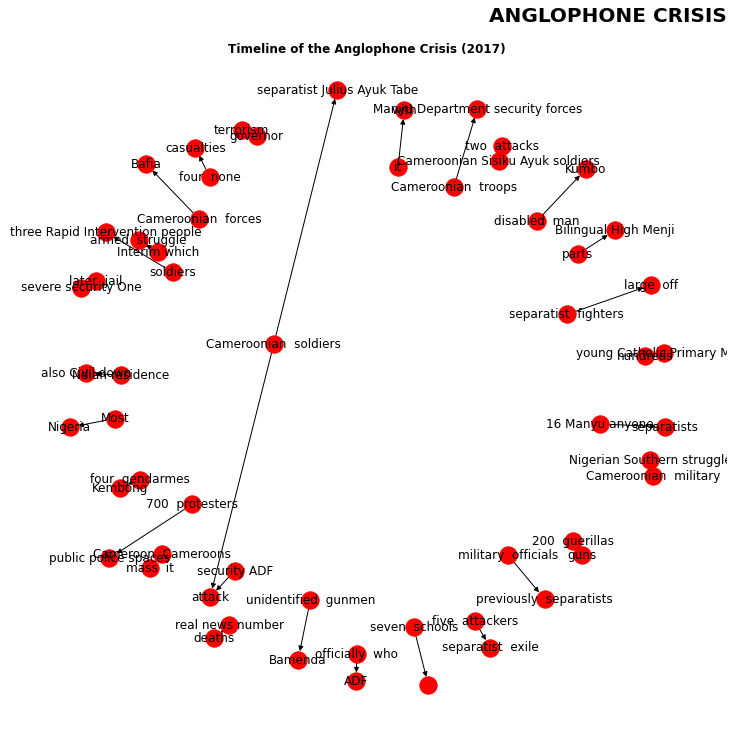

In [383]:
# create a directed-graph from a dataframe
G = nx.from_pandas_edgelist(kg_df[:30], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())


plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='red', edge_cmap=plt.cm.Blues, pos = pos)
plt.title("ANGLOPHONE CRISIS", fontsize=20, loc='right', fontweight='bold')
plt.suptitle('Timeline of the Anglophone Crisis (2017)', fontweight='bold')
plt.show()

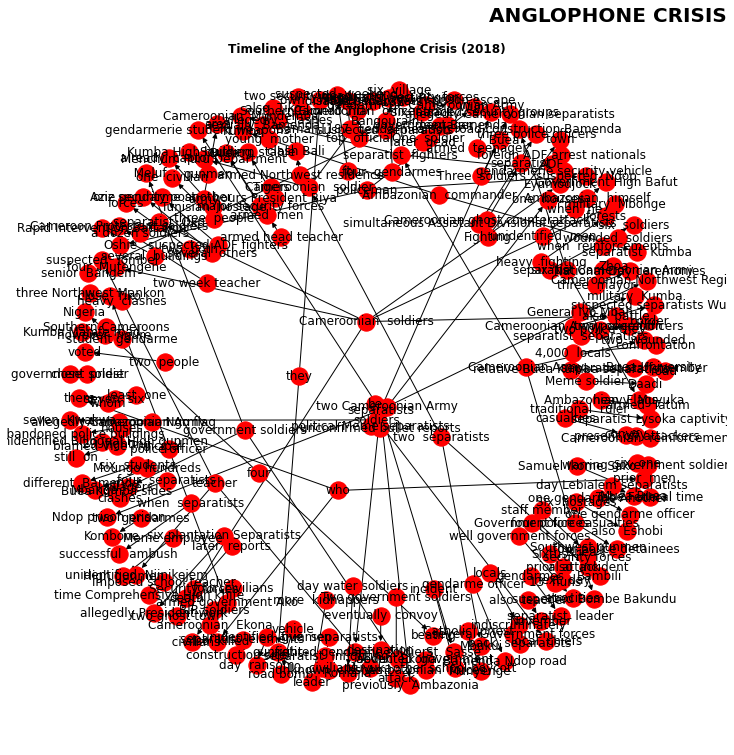

In [355]:
# create a directed-graph from a dataframe
G = nx.from_pandas_edgelist(kg_df[30:189], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())


plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='red', edge_cmap=plt.cm.Blues, pos = pos)
plt.title("ANGLOPHONE CRISIS", fontsize=20, loc='right', fontweight='bold')
plt.suptitle('Timeline of the Anglophone Crisis (2018)', fontweight='bold')
plt.show()

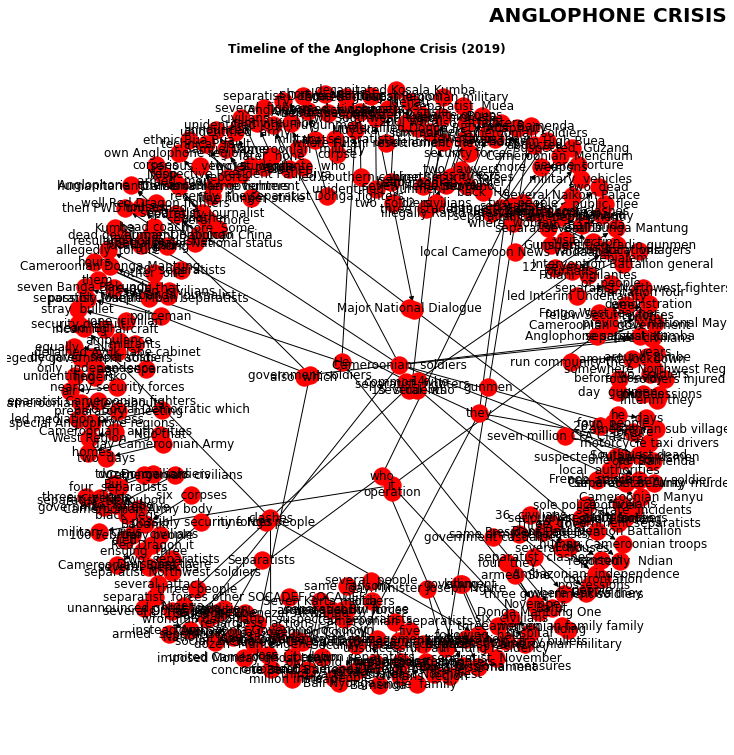

In [356]:
# create a directed-graph from a dataframe
G = nx.from_pandas_edgelist(kg_df[189:401], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())


plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='red', edge_cmap=plt.cm.Blues, pos = pos)
plt.title("ANGLOPHONE CRISIS", fontsize=20, loc='right', fontweight='bold')
plt.suptitle('Timeline of the Anglophone Crisis (2019)', fontweight='bold')
plt.show()

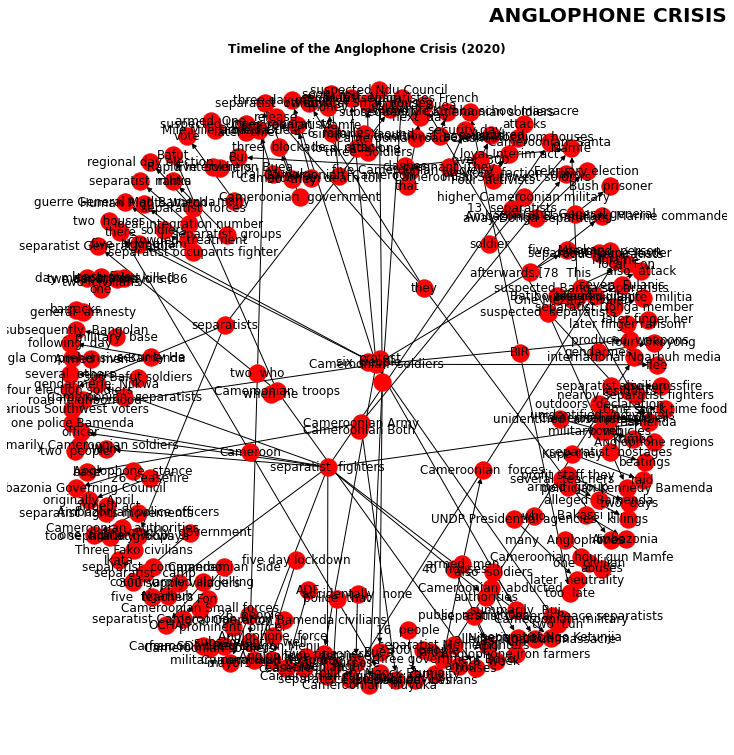

In [357]:
# create a directed-graph from a dataframe
G = nx.from_pandas_edgelist(kg_df[401:562], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())


plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='red', edge_cmap=plt.cm.Blues, pos = pos)
plt.title("ANGLOPHONE CRISIS", fontsize=20, loc='right', fontweight='bold')
plt.suptitle('Timeline of the Anglophone Crisis (2020)', fontweight='bold')
plt.show()

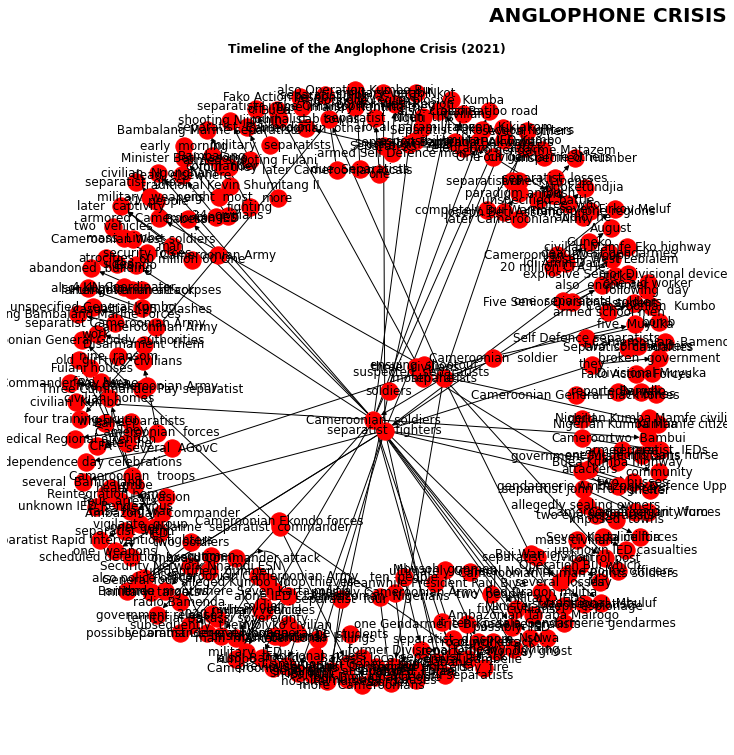

In [358]:
# create a directed-graph from a dataframe
G = nx.from_pandas_edgelist(kg_df[562:749], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())


plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='red', edge_cmap=plt.cm.Blues, pos = pos)
plt.title("ANGLOPHONE CRISIS", fontsize=20, loc='right', fontweight='bold')
plt.suptitle('Timeline of the Anglophone Crisis (2021)', fontweight='bold')
plt.show()

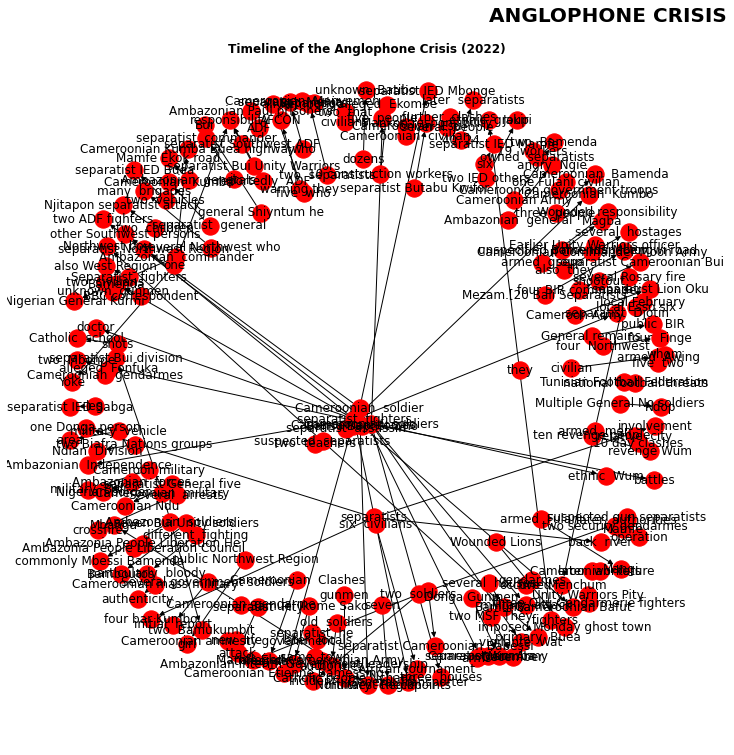

In [384]:
# create a directed-graph from a dataframe
G = nx.from_pandas_edgelist(kg_df[749:], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())


plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='red', edge_cmap=plt.cm.Blues, pos = pos)
plt.title("ANGLOPHONE CRISIS", fontsize=20, loc='right', fontweight='bold')
plt.suptitle('Timeline of the Anglophone Crisis (2022)', fontweight='bold')
plt.show()

# Pyvis

In [361]:
#!pip install pyvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 748 kB 30.8 MB/s 
     |████████████████████████████████| 1.6 MB 61.4 MB/s 
  Created wheel for pyvis: filename=pyvis-0.3.1-py3-none-any.whl size=755850 sha256=3d95a9988e1d8cbcc24c4b07d8e3d36b08fbc3cb6f0a1175a19eb8ab381b9194
  Stored in directory: /root/.cache/pip/wheels/12/17/67/179b65f101f0d0236e67b2fa039e5d387806348e80205c6985
Successfully built pyvis


In [375]:
"""from pyvis.network import Network

sources = kg_df[749:]['source']
targets = kg_df[749:]['target']
weights = kg_df[749:]['edge']

edge_data = zip(sources, targets, weights)

net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white")

# set the physics layout of the network
net.barnes_hut()

for e in edge_data:
                src = e[0]
                dst = e[1]
                w = e[2]

                net.add_node(src, src, title=src)
                net.add_node(dst, dst, title=dst)
                net.add_edge(src, dst, value=w)

neighbor_map = net.get_adj_list()

# add neighbor data to node hover data
for node in net.nodes:
                node["title"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
                node["value"] = len(neighbor_map[node["id"]])

net.toggle_physics(True)
net.show_buttons(filter_=True)
net.show(f'A17.html')"""

In [336]:
"""G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="composed by"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='red', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos, font_weight='bold')
plt.show()

################################################################################

G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="written by"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='red', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

################################################################################

G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="released in"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='red', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()"""

'G=nx.from_pandas_edgelist(kg_df[kg_df[\'edge\']=="composed by"], "source", "target", \n                          edge_attr=True, create_using=nx.MultiDiGraph())\n\nplt.figure(figsize=(12,12))\npos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes\nnx.draw(G, with_labels=True, node_color=\'red\', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos, font_weight=\'bold\')\nplt.show()\n\n################################################################################\n\nG=nx.from_pandas_edgelist(kg_df[kg_df[\'edge\']=="written by"], "source", "target", \n                          edge_attr=True, create_using=nx.MultiDiGraph())\n\nplt.figure(figsize=(12,12))\npos = nx.spring_layout(G, k = 0.5)\nnx.draw(G, with_labels=True, node_color=\'red\', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)\nplt.show()\n\n################################################################################\n\nG=nx.from_pandas_edgelist(kg_df[kg_df[\'edge\']=="released in"], "source", "targe